# Accidents

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
from simpledbf import Dbf5
import requests
import chardet
import os
%matplotlib notebook

## Data Cleaning

In [14]:
def download_mx_entities():
    """
    Download a csv file with the mexico entities' key codes
    """
    # URL of the ziped file to extract (Mexico Entities)
    file = "http://geoweb.inegi.org.mx/mgn2kData/mgntmp/0A9548CB7527D3C5B9F5BF6D1C7E8555/ARCH159.ZIP"
    extract_to = "/Users/gerardo/Documents/github/machine_learning/scikitlearn_tflow/datasets/inegi"
    outfile = "ARCH159.CSV"
    full_path = os.path.join(extract_to, outfile)
    
    if full_path not in os.listdir(extract_to):
        # Connect to the url
        r = requests.get(file)
        # Get the zipped file
        zipf = ZipFile(BytesIO(r.content))
        # Store it in memory, if it exists in it
        zipf.extract(outfile, extract_to)    
        return True
    else:
        return False
    
result = download_mx_entities()
print(result)

# The 10th row has a different encoding, this represents how
# different encodings per row can make Pandas to fail whenever we
# might read a file
with open("./datasets/inegi/ARCH159.CSV", "rb") as f:
    for i in range(10):
        result = chardet.detect(f.readline())
        print(result)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gerardo/Documents/github/machine_learning/scikitlearn_tflow/datasets/inegi'

True

{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ascii', 'confidence': 1.0}
{'language': '', 'encoding': 'ISO-8859-1', 'confidence': 0.73}


### Reading the entities' file

In [4]:
entities = pd.read_csv("datasets/inegi/ARCH159.CSV", encoding="iso-8859-1")

In [6]:
entities.tail()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,LAT_DEC,LON_DEC,ALTITUD
304442,32,Zacatecas,58,Santa Maria de la Paz,39,San Isidro,21.486425,-103.337268,2031
304443,32,Zacatecas,58,Santa Maria de la Paz,40,San Jose,21.516539,-103.456568,1824
304444,32,Zacatecas,58,Santa Maria de la Paz,41,San Miguel Tepetitlan,21.504213,-103.335932,1977
304445,32,Zacatecas,58,Santa Maria de la Paz,42,San Rafael,21.527595,-103.372259,2042
304446,32,Zacatecas,58,Santa Maria de la Paz,43,Santa Fe,21.528992,-103.385095,2021


#### Removing Duplicates

In [13]:
states = entities[["CVE_ENT", "NOM_ENT"]].drop_duplicates()
municipalities = entities[["NOM_MUN", "CVE_MUN",
                           "LAT_DEC", "LON_DEC", "ALTITUD"]].drop_duplicates()

In [14]:
states

,CVE_ENT,NOM_ENT
0,1,Aguascalientes
2940,2,Baja California
10000,3,Baja California Sur
15160,4,Campeche
20580,5,Coahuila de Zaragoza
30555,6,Colima
34211,7,Chiapas
60501,8,Chihuahua
82433,9,Ciudad de Mexico
83103,10,Durango


### Reading the 'accidentes' file

In [7]:
accidents = Dbf5("datasets/inegi/accidentes.dbf")
accidents = accidents.to_dataframe()
accidents.describe()

,EDO,MES,ANIO,MPIO,HORA,MINUTOS,DIA,DIASEMANA,URBANA,SUBURBANA,...,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO
count,378232.000000,378232.000000,378232.0,378232.000000,378232.000000,378232.000000,378232.00000,378232.000000,378232.000000,378232.000000,...,378232.000000,378232.000000,378232.000000,378232.000000,378232.000000,378232.000000,378232.000000,378232.000000,378232.0,378232.0
mean,16.004410,6.562144,2015.0,35.584530,12.869392,23.779181,15.61140,4.083459,1.146487,0.142965,...,0.003241,0.106945,0.002850,0.041858,0.000523,0.010327,0.000193,0.001615,0.0,0.0
std,7.572394,3.450199,0.0,39.552065,6.101799,18.053166,8.75761,1.991819,0.516741,0.536515,...,0.078589,0.576523,0.054923,0.220198,0.022989,0.104516,0.020885,0.052989,0.0,0.0
min,1.000000,1.000000,2015.0,1.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,10.000000,4.000000,2015.0,12.000000,8.000000,5.000000,8.00000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,17.000000,7.000000,2015.0,27.000000,13.000000,25.000000,16.00000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,20.000000,10.000000,2015.0,39.000000,18.000000,40.000000,23.00000,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,32.000000,12.000000,2015.0,570.000000,23.000000,59.000000,31.00000,7.000000,2.000000,3.000000,...,12.000000,46.000000,3.000000,10.000000,2.000000,4.000000,10.000000,8.000000,0.0,0.0


## Data Analysis

### Plotting Mexico's Municipalities

<IPython.core.display.Javascript object>


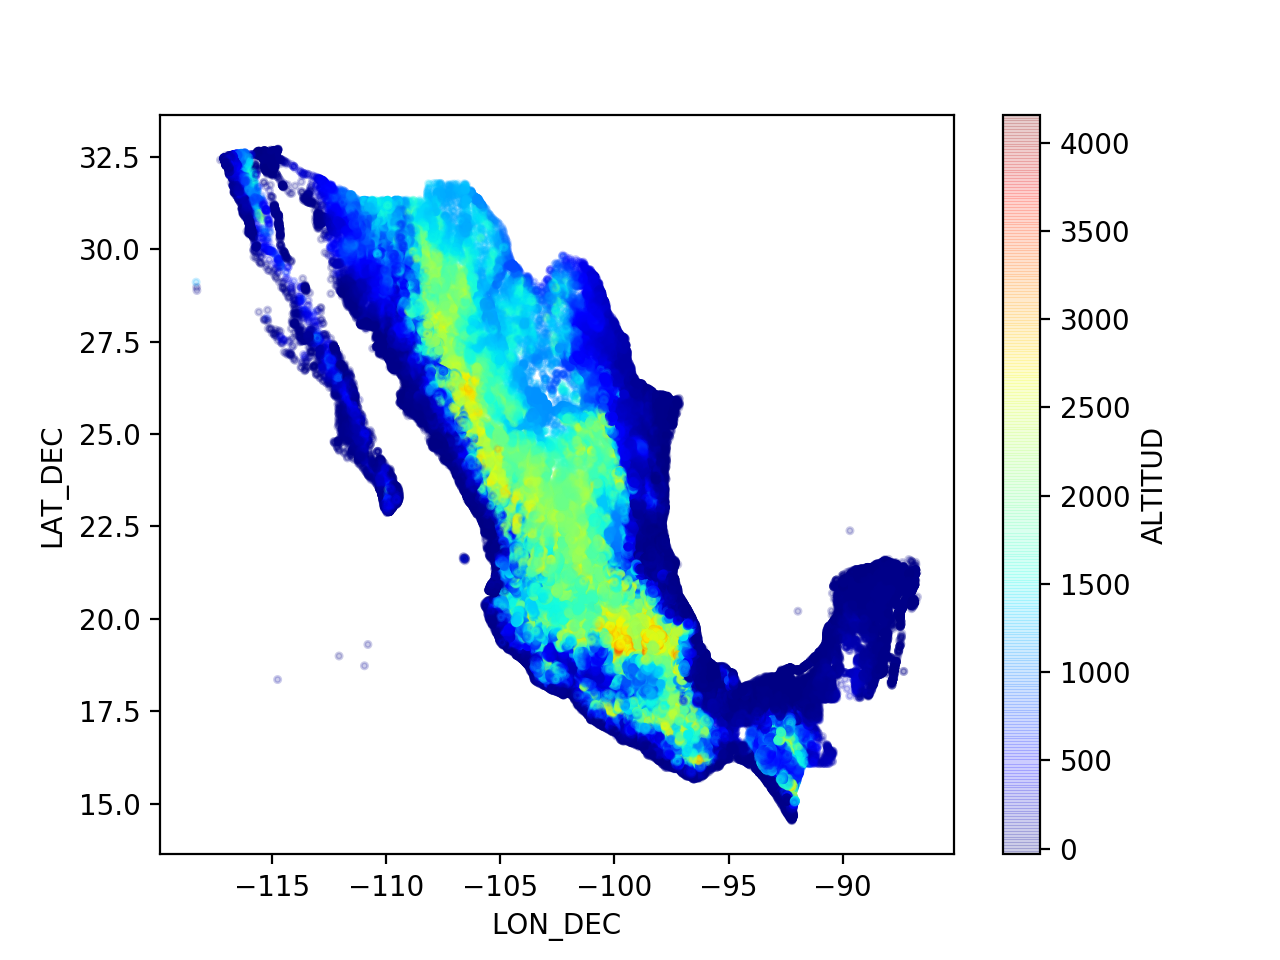

In [12]:
entities.plot(kind="scatter", x="LON_DEC", y="LAT_DEC",
              c="ALTITUD",cmap=plt.get_cmap("jet"), s=5, alpha=0.2)
plt.show()

### Getting information from the accidents

In [13]:
acc="""Clave 1.- Colisión con vehículo automotor
Clave 2.- Colisión con peatón (atropellamiento)
Clave 3.- Colisión con animal
Clave 4.- Colisión con objeto fijo
Clave 5.- Volcadura
Clave 6.- Caída de pasajero
Clave 7.- Salida del camino
Clave 8.- Incendio
Clave 9.- Colisión con ferrocarril
Clave 10.- Colisión con motocicleta
Clave 11.- Colisión con ciclista
Clave 12.- Otro""".replace("Clave ", "").replace(".- ", ",")

accidents_labels = {}
for element in acc.split("\n"):
    key, accident_label = element.split(",")
    accidents_labels[int(key)] = accident_label

In [15]:
accidents_labels

{1: 'Colisión con vehículo automotor',
 2: 'Colisión con peatón (atropellamiento)',
 3: 'Colisión con animal',
 4: 'Colisión con objeto fijo',
 5: 'Volcadura',
 6: 'Caída de pasajero',
 7: 'Salida del camino',
 8: 'Incendio',
 9: 'Colisión con ferrocarril',
 10: 'Colisión con motocicleta',
 11: 'Colisión con ciclista',
 12: 'Otro'}

<IPython.core.display.Javascript object>


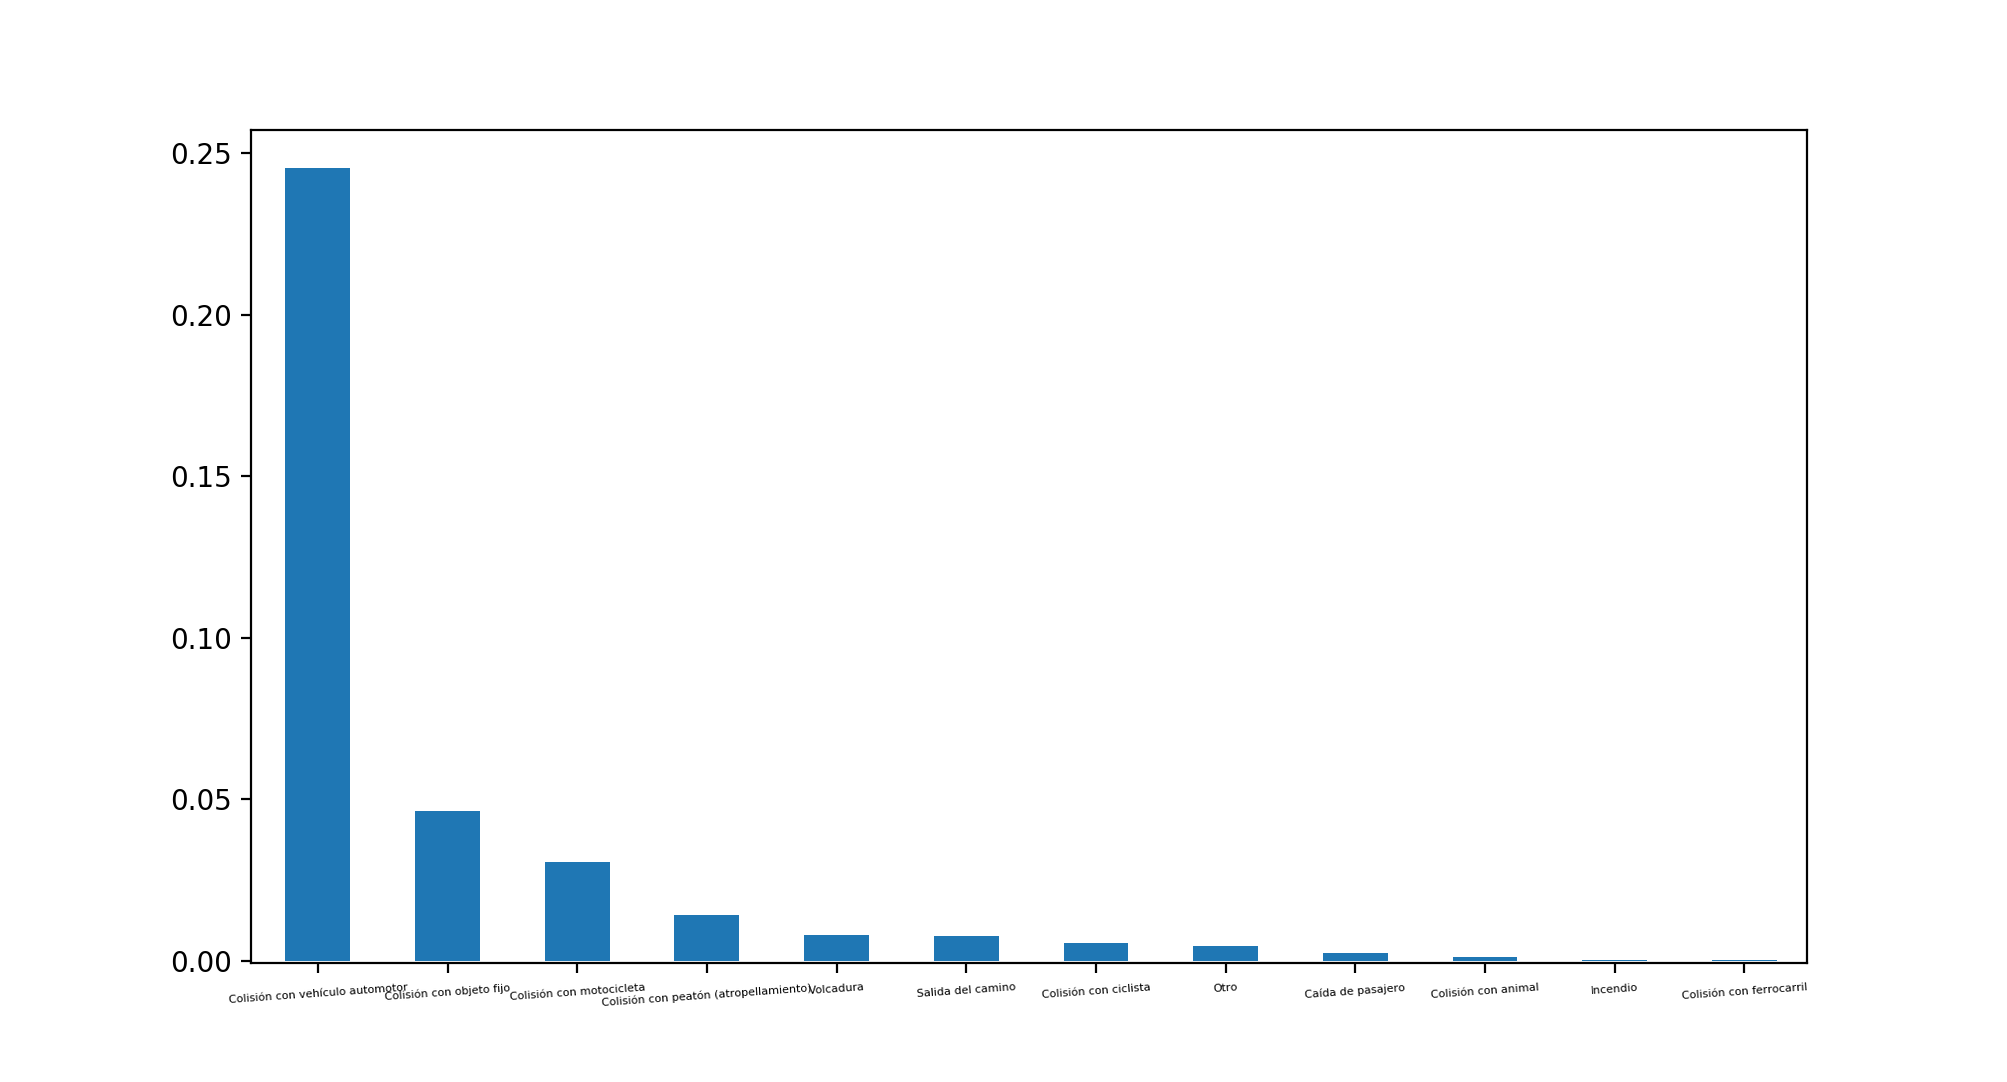

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

In [219]:
accidents_freq = accidents.TIPACCID.apply(lambda x: accidents_dict[x]).value_counts() / sum(accidents.TIPACCID)
accidents_freq.plot(kind="bar", align="center")
plt.xticks(rotation=4, size=4)

<IPython.core.display.Javascript object>


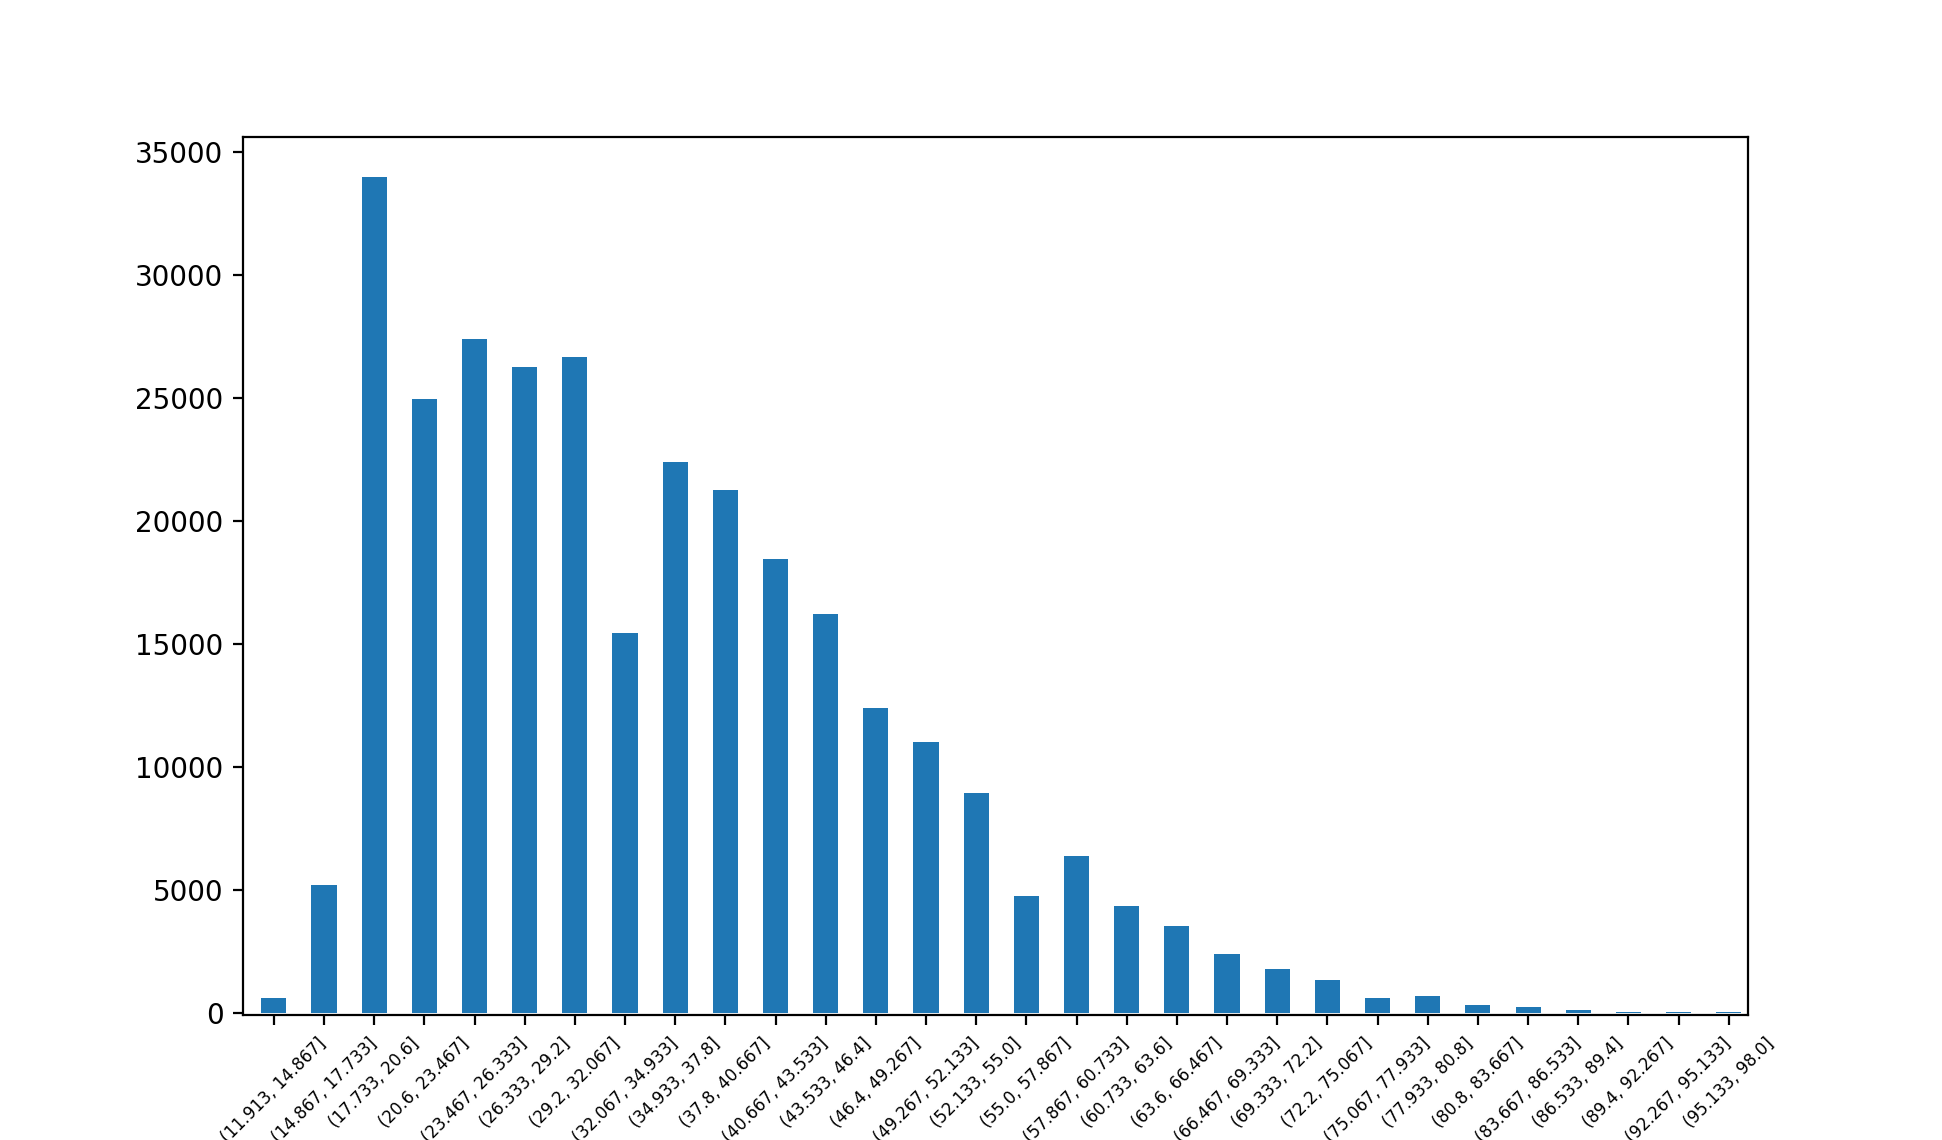

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

In [41]:
accidents.query("EDAD not in [99,0]").EDAD.value_counts(bins=30).sort_index().plot(kind="bar")
plt.xticks(size=6, rotation=45);